In [100]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')
# torch.save(data, open('traindata.pt', 'wb'))

In [101]:
data.shape

(100, 1000)

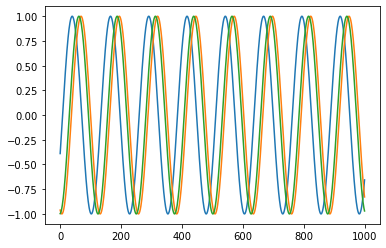

In [102]:
plt.plot(data[1,:])
plt.plot(data[3,:])
plt.plot(data[99,:])

In [106]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt

# class Sequence(nn.Module):
#     def __init__(self):
#         super(Sequence, self).__init__()
#         self.lstm1 = nn.LSTMCell(1, 51) #(input_size, hidden size)
#         self.lstm2 = nn.LSTMCell(51, 51) 
#         self.linear = nn.Linear(51, 1) #(hidden_dims, outputsize )

#     def forward(self, input, future = 0): #input.shape = (batch_size, timesteps) e.g.[97, 999]
#         outputs = [] 
#         print(f'input.shape {input.shape}')
#         h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
#         c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
#         h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
#         c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

#         for input_t in input.split(1, dim=1):
#             print(f'input.split(1, dim=1): {input_t.shape}')
#             h_t, c_t = self.lstm1(input_t, (h_t, c_t))
#             print(f'h_t: {h_t.shape}')
#             h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
#             output = self.linear(h_t2)
#             outputs += [output]
#         for i in range(future):# if we should predict the future
#             h_t, c_t = self.lstm1(output, (h_t, c_t))
#             h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
#             output = self.linear(h_t2)
#             outputs += [output]
#         outputs = torch.cat(outputs, dim=1)
#         return outputs




In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTM(input_size = 1, hidden_size = 51, num_layers=2, batch_first=True) #(input_size, hidden size)
        # self.lstm2 = nn.LSTMCell(51, 51) 
        self.linear = nn.Linear(51, 1) #(hidden_dims, outputsize )

    def forward(self, input, future = 0): #input.shape = (batch_size, timesteps) e.g.[97, 999]
        outputs = [] 
        
        # print(f'input.shape {input.shape}')
        h_t = torch.zeros(2, input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(2, input.size(0), 51, dtype=torch.double)
        # h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        # c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for input_t in input.split(1, dim=1):

            in_data= torch.unsqueeze(input=input_t, dim=1)
            # print(f'input.split(1, dim=1): {in_data.shape}')
            out, (h_t, c_t) = self.lstm1(in_data, (h_t, c_t))
            # print(f'h_t[-1]: {h_t[-1].shape}')
            # h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t[-1])
            # print(f'output of fist loop: {output.shape}')
            outputs += [output]
        # print(f'we are done now yay: output.shape {output.shape}')
        for i in range(future):# if we should predict the future
            out_data= torch.unsqueeze(input=output, dim=1)
            # print(f'out_data.shape: {i} + {out_data.shape}')
            out, (h_t, c_t) = self.lstm1(out_data, (h_t, c_t))
            # h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t[-1])
            outputs += [output]
        outputs = torch.cat(outputs, dim=1)
        return outputs


In [108]:
import torch.optim as optim

np.random.seed(0)
torch.manual_seed(0)
# load data and make training set
# data = torch.load('traindata.pt')
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])

In [112]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class create_dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.len = x.shape[0]
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    def __len__(self):
        return self.len
    
ds = create_dataset(input, target)

train_loader = DataLoader(ds, shuffle = True, batch_size = 32)

STEP:  0
loss: 0.500879110471573
loss: 0.49194139962495
loss: 0.48266651888205236
loss: 0.4756096423575195
Epoch 1, Loss: 0.4877741678340237
test loss: 0.46761015515527243
STEP:  1
loss: 0.4653546416458516
loss: 0.4567411142204928
loss: 0.4471186623552199
loss: 0.43853870936675415
Epoch 2, Loss: 0.45193828189707963
test loss: 0.42787470396960975
STEP:  2
loss: 0.4260957625032475
loss: 0.41366552832956205
loss: 0.401030755648804
loss: 0.38798516654621334
Epoch 3, Loss: 0.4071943032569567
test loss: 0.3691241638461951
STEP:  3
loss: 0.36819321579478076
loss: 0.34790796927428086
loss: 0.3259494096983971
loss: 0.30001490627614114
Epoch 4, Loss: 0.33551637526089995
test loss: 0.2731183315392831
STEP:  4
loss: 0.2731557285296867
loss: 0.24421100960346262
loss: 0.21526970354915836
loss: 0.18764303862452317
Epoch 5, Loss: 0.2300698700767077
test loss: 0.1652396198325279
STEP:  5
loss: 0.16693368913885737
loss: 0.1479382700145165
loss: 0.12907088160452826
loss: 0.11549624607685688
Epoch 6, Loss

KeyboardInterrupt: 

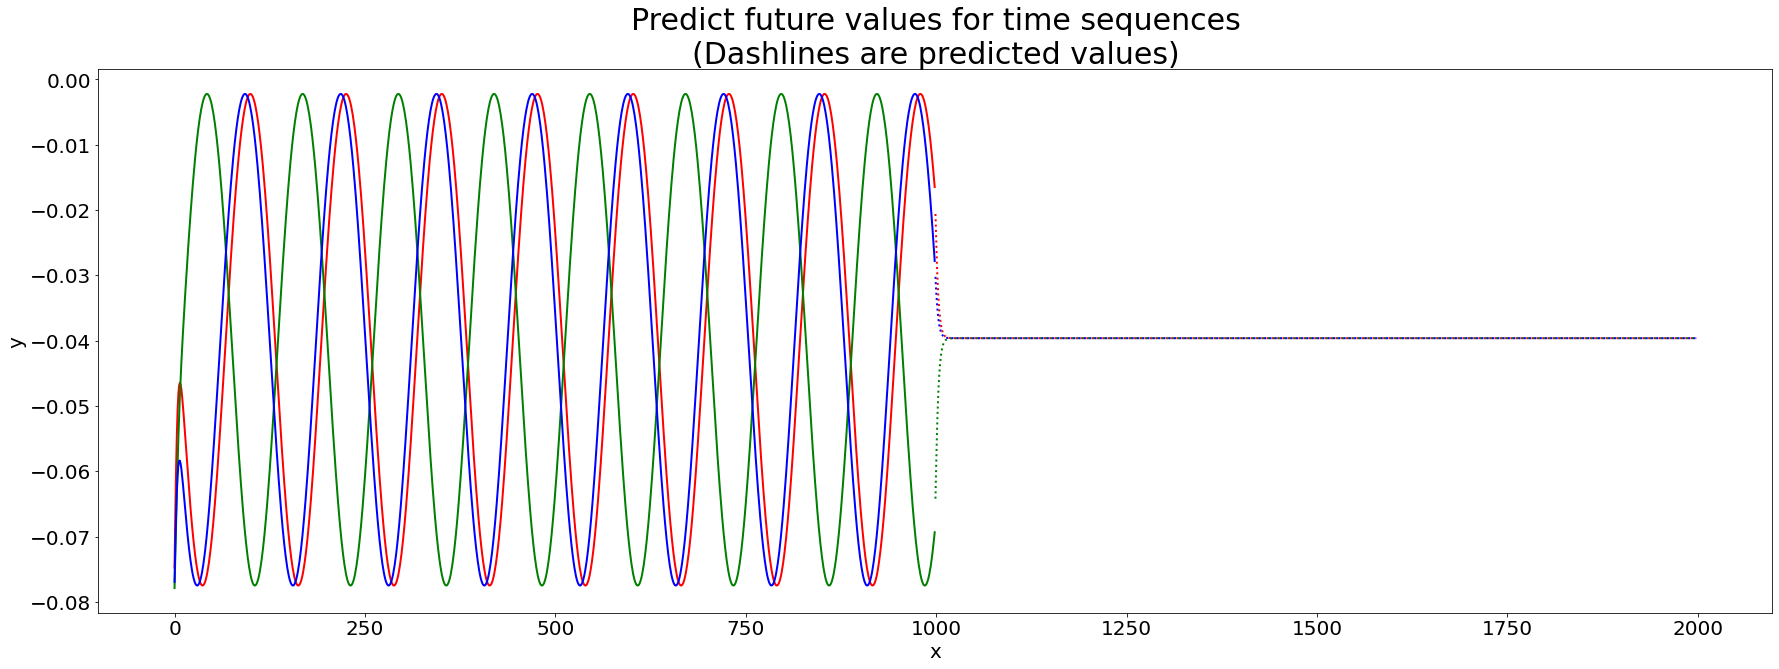

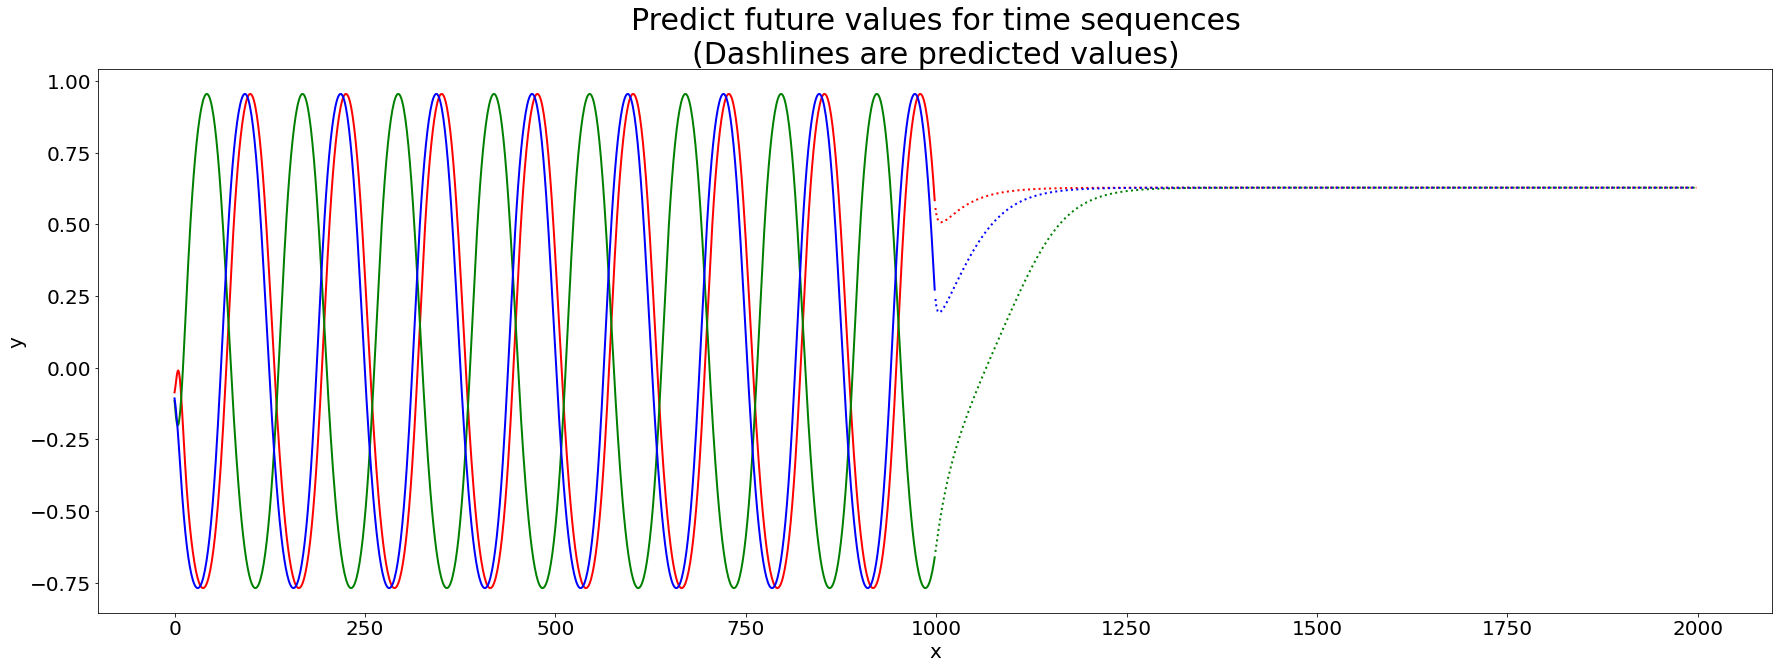

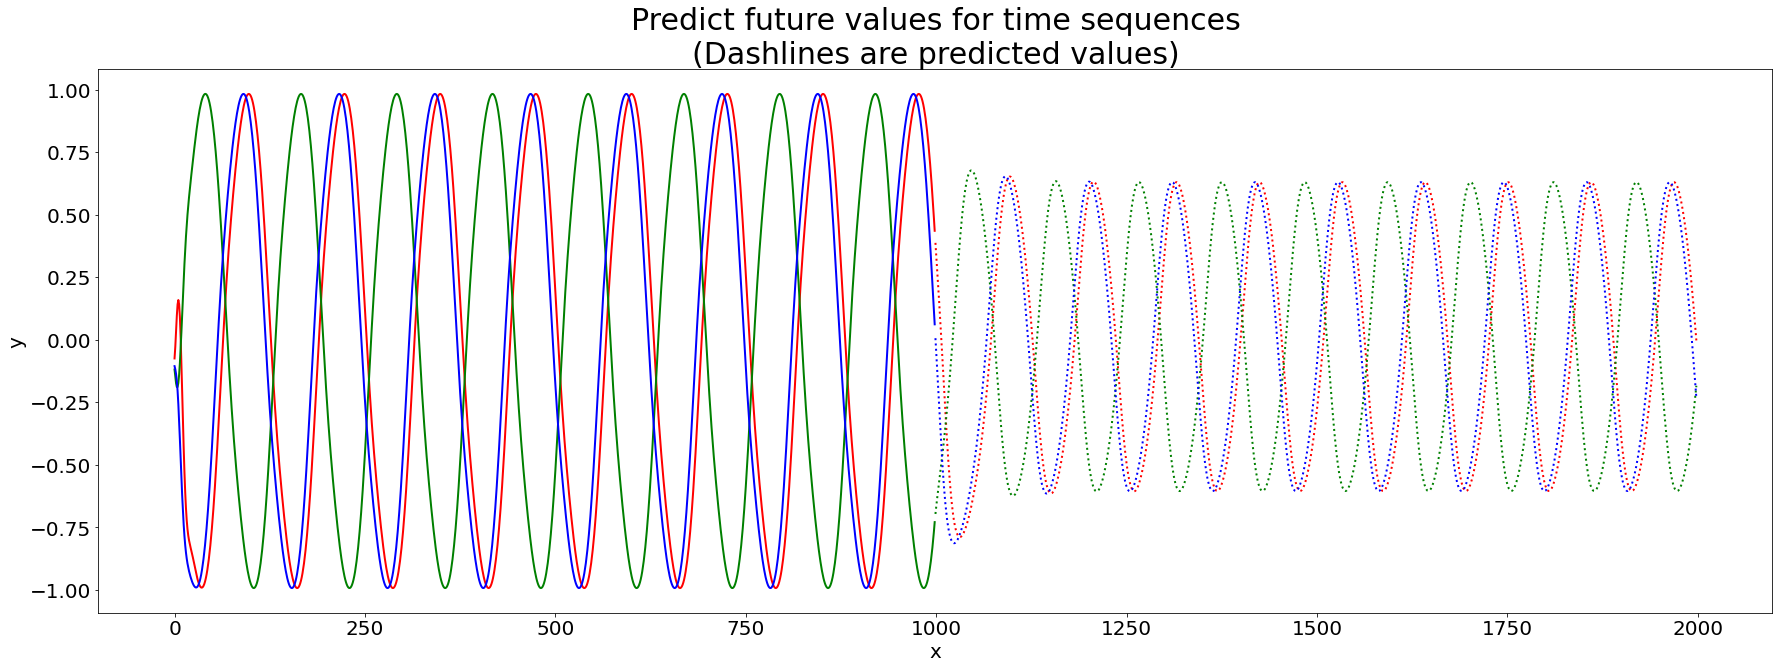

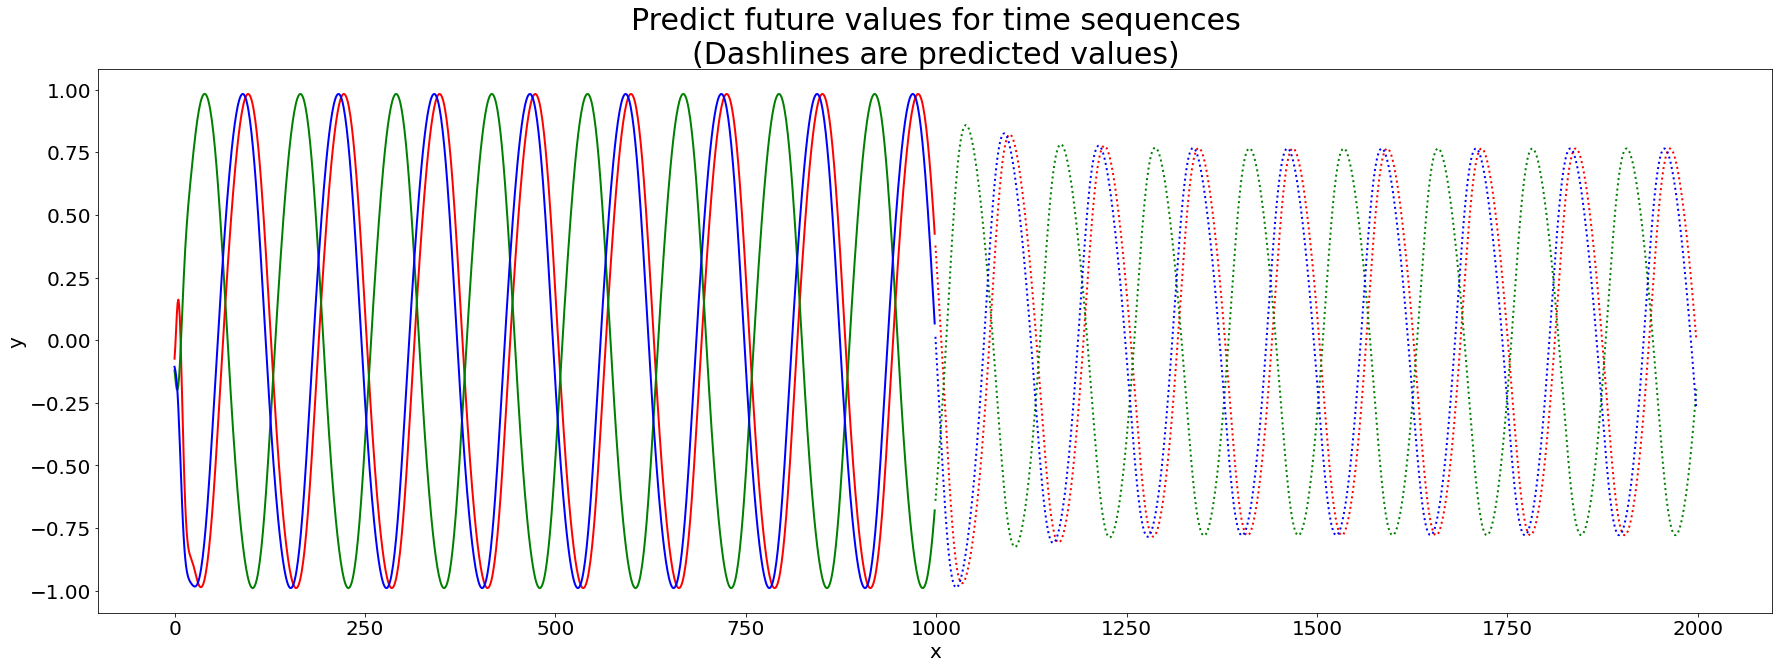

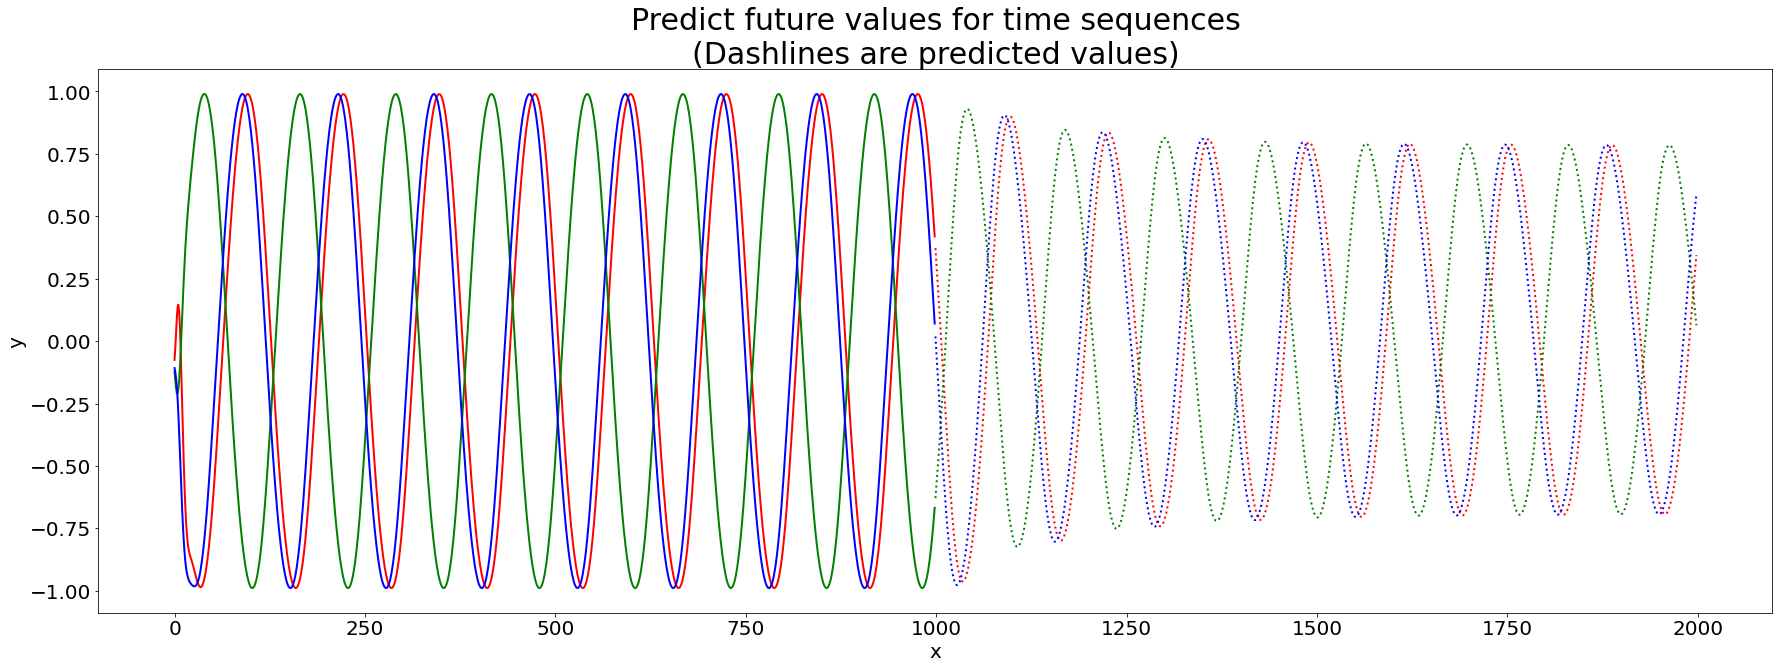

In [113]:
# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
# optimizer = optim.Adam(seq.parameters(), lr=0.8)
optimizer = optim.Adam(seq.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

#begin to train
for i in range(100):
    print('STEP: ', i)
    running_train_loss = 0.
    for input,target in train_loader:
        # def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        running_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Epoch {i+1}, Loss: {running_train_loss/len(train_loader)}")
    # optimizer.zero_grad()
    # out = seq(input)
    # loss = criterion(out, target)
    # print('loss:', loss.item())
    # loss.backward()
   
    # optimizer.step()
    scheduler.step()
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()
    # draw the result
    if i % 10 ==  0:
        plt.figure(figsize=(30,10))
        plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        def draw(yi, color):
            plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
            plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
        draw(y[0], 'r')
        draw(y[1], 'g')
        draw(y[2], 'b')
            # plt.savefig('predict%d.pdf'%i)
            # plt.close()

In [84]:
import torch.optim as optim
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


In [74]:
seq = Sequence().to(DEVICE)
seq.double()

Sequence(
  (lstm1): LSTMCell(1, 50)
  (lstm2): LSTMCell(50, 50)
  (linear): Linear(in_features=50, out_features=36, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=36, out_features=24, bias=True)
  (linear3): Linear(in_features=24, out_features=1, bias=True)
)

In [75]:
def setDevice():
  DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
  return DEVICE

In [76]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


Epoch 1, Loss: 0.010391402675536145
test loss: 0.5104477206703637
Epoch 2, Loss: 0.010391402675536145
test loss: 0.5104477206703637
Epoch 3, Loss: 0.010391402675536145
test loss: 0.5104477206703637
Epoch 4, Loss: 0.010391402675536145
test loss: 0.5104477206703637


KeyboardInterrupt: 

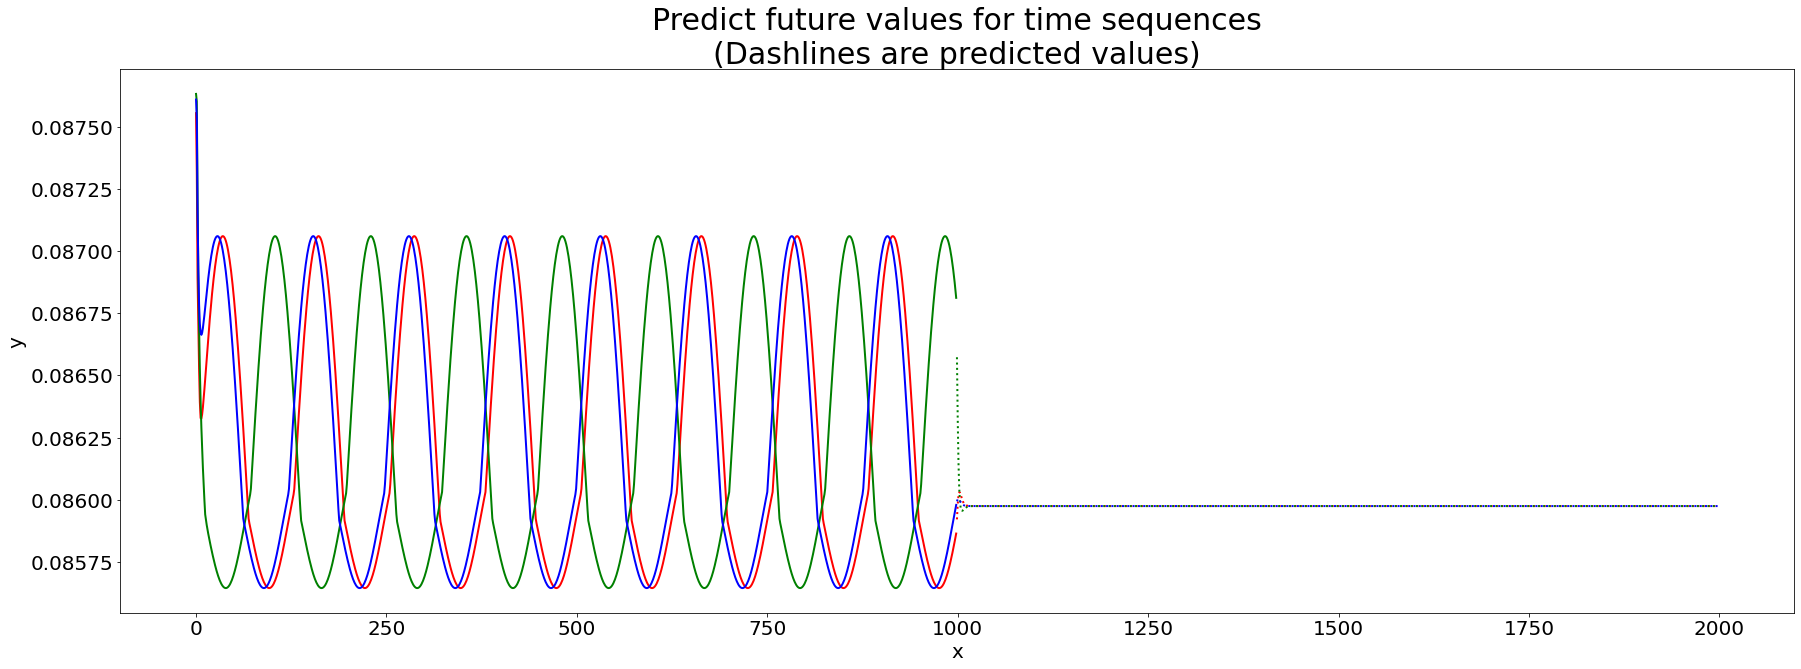

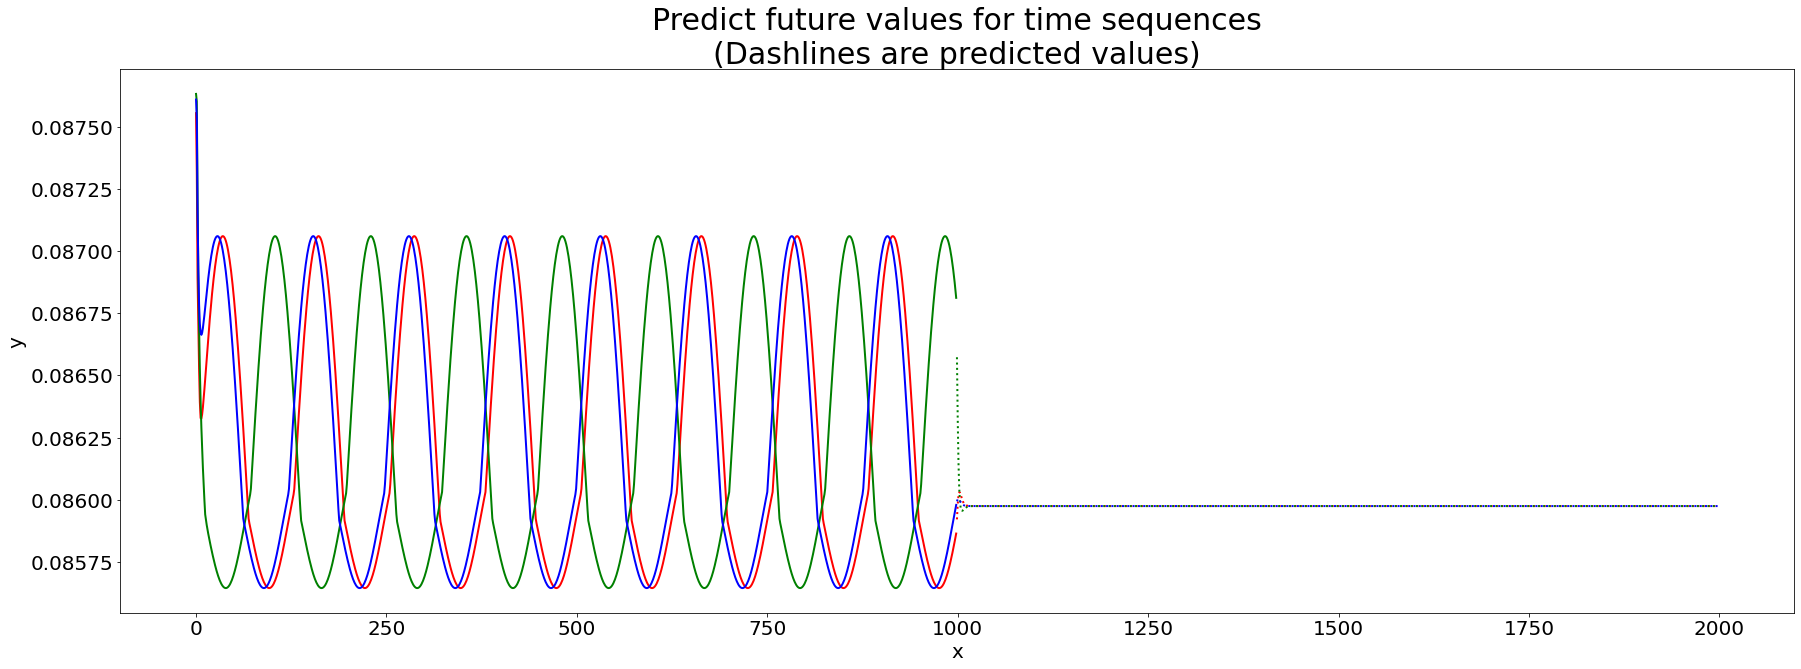

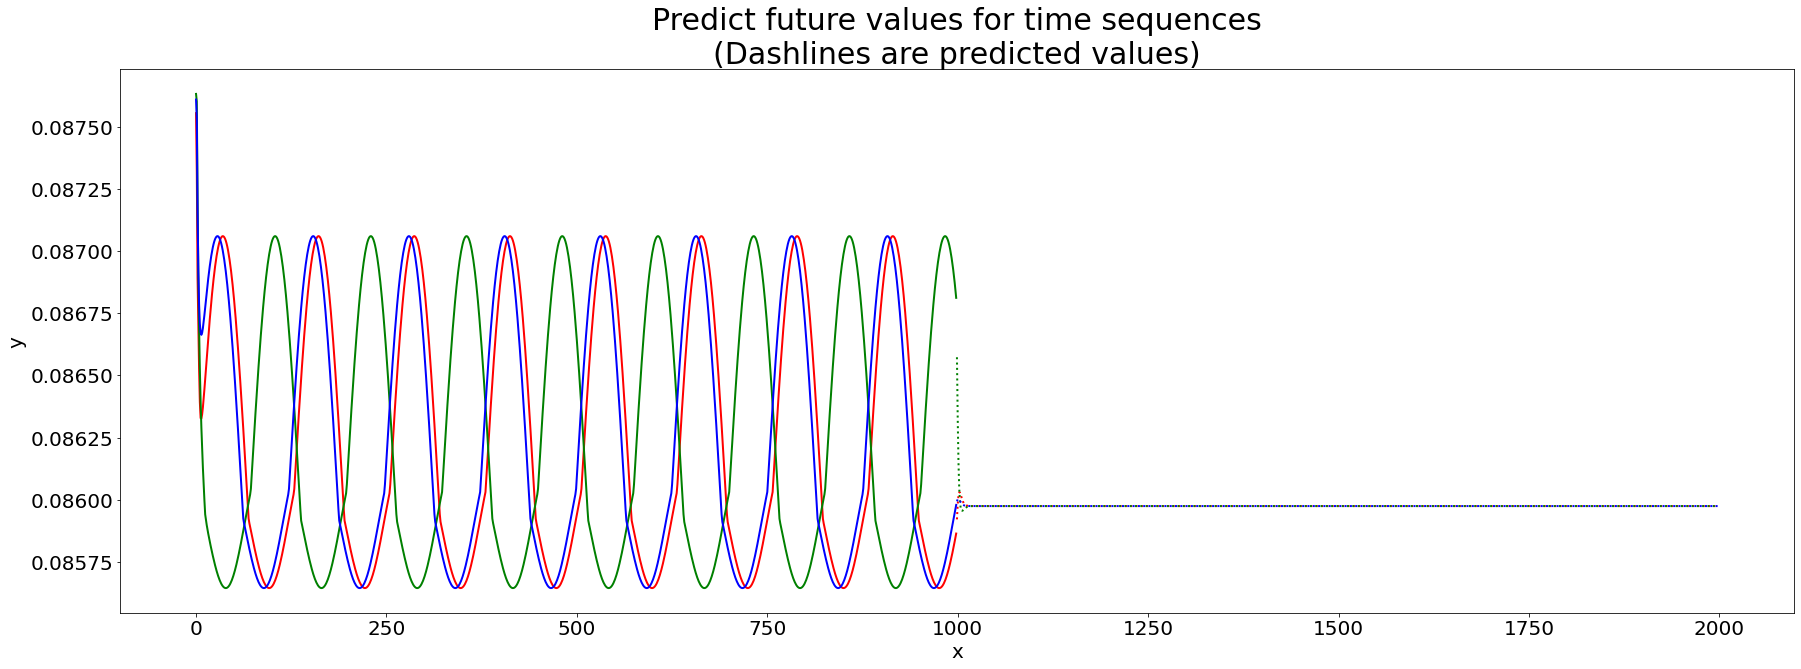

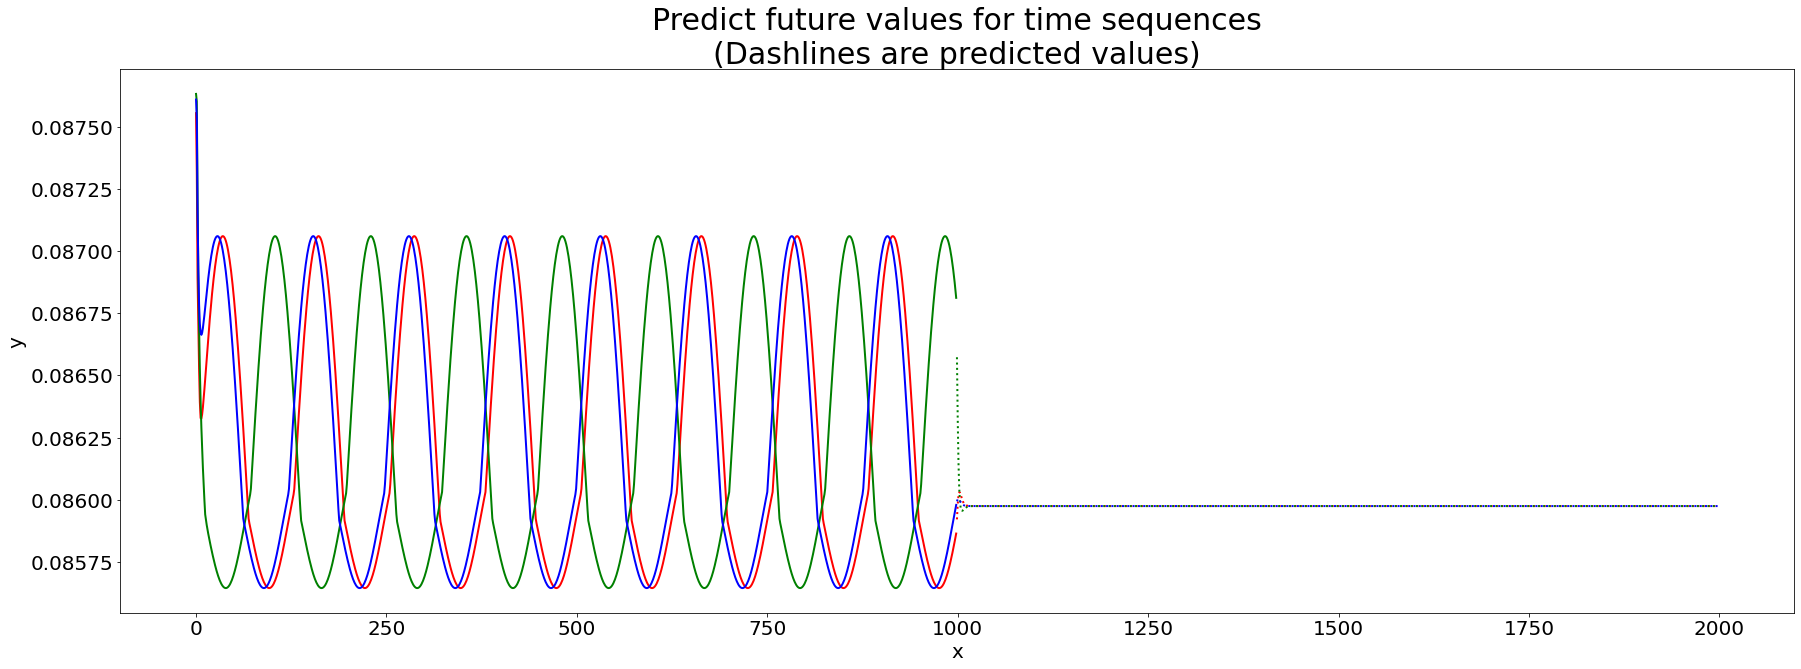

In [77]:
for i in range(50):
    loss = 0.0
    num_len = 0
    seq.train()
    for x,y in train_loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        batch_size = x.shape[0]
        y_pred = seq(x)
        optim.zero_grad()
        loss = criterion(y_pred, y)
        loss.backward()
        optim.step()
        num_len += batch_size
        loss += (batch_size * loss.item())
    loss = loss / (num_len)
    print(f"Epoch {i+1}, Loss: {loss}")
    
    with torch.no_grad():
        future = 1000
        test_input, test_target = test_input.to(DEVICE), test_target.to(DEVICE)
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        print("==========================")
        y = pred.detach().cpu().numpy()
    
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    # plt.savefig('predict%d.pdf'%i)
    # plt.close()